In [593]:

import json
# Calculate the Euclidean distance
# between two points
from functools import reduce
from textwrap import wrap

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap


def distance_2d(x1, y1, x2, y2):
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** (1 / 2)


# Function to calculate K closest points
def kClosest(points, target, K):
    pts = []
    position = []
    dist = []
    n = len(points)
    d = []

    for i in range(n):
        d.append({
            "first": distance_2d(points[i][0], points[i][1], target[0], target[1]),
            "second": i
        })

    d = sorted(d, key=lambda l: l["first"])

    for i in range(K):
        pt = []
        dist.append(d[i]["first"])
        position.append(d[i]["second"])
        pt.append(points[d[i]["second"]][0])
        pt.append(points[d[i]["second"]][1])
        pts.append(pt)

    return dict(zip(position, dist))






In [594]:

# Function to calculate K closest points
from scipy.spatial import distance


def kClosest_high(points, target, K):
    pts = []
    position = []
    dist = []
    n = len(points)
    d = []

    for i in range(n):
        d.append({
            "first": distance.cosine(points[i], target),
            "second": i
        })

    d = sorted(d, key=lambda l: l["first"])

    pt = []
    for i in range(K):
        dist.append(d[i]["first"])
        position.append(d[i]["second"])
        # pt.append(points[d[i]["second"]])
    return dict(zip(position, dist))

In [607]:
def load_points(model, article, k):
    f = open(f'../embeddings/low_dimension/{model}_low_dim.json')
    data = json.load(f)
    target = data[article]
    articles_title = list(data.keys())
    corpus_embedding = list(data.values())
    closest_points = kClosest(corpus_embedding, target, k)
    near_values = {}
    for k in closest_points.keys():
        print(articles_title[k], ':', closest_points[k])
        near_values[articles_title[k]] = closest_points[k]
    return near_values

In [613]:
def draw_plot(target_title, K):
    # models = ['all_mpnet_base_v2', 'allenai_specter', 'biowordvec',
    #           'generic_fasttext']
    # model_names = ['all-mpnet-base-v2', 'allenai-specter', 'BioWordVec',
    #           'Generic fastText']
    # models = ['all_mpnet_base_v2', 'allenai_specter', 'pubmedbert', 'biowordvec', 'generic_fasttext', 'tfidf', 'bow']
    # model_names = ['all-mpnet-base-v2', 'allenai-specter', 'PubMedBERT', 'Avg. BioWordVec', 'Avg. Generic fastText',
    #                'TFIDF', 'BOW']
    # models = ['biowordvec', 'generic_fasttext']
    # model_names = ['Avg. BioWordVec', 'Avg. Generic fastText']
    # models = ['allenai_specter','all_mpnet_base_v2']
    model_names = ['all_mpnet_base_v2', 'allenai_specter']
    models = ['all_mpnet_base_v2', 'allenai_specter']

    all_points = {model: load_points(model, target_title, k=236) for model in models}
    points = {model: load_points(model, target_title, k=K) for model in models}

    # print(len(points))
    allkey = reduce(set.union, map(set, map(dict.keys, points.values())))
    if target_title in allkey:
        allkey.remove(target_title)

    d = np.zeros((len(allkey), len(models)))
    all_dist = []
    index_a = []
    for key in allkey:
        item = [points[m][key] if key in points[m] else all_points[m][key] for m in models]
        a = [list(points[m].keys()).index(key) if key in points[m] else list(all_points[m].keys()).index(key) for m in
             models]
        index_a.append(a)
        all_dist.append(item)

    A = np.array(all_dist)
    B = np.array(index_a)
    avg = np.average(A, axis=0)

    labels = ['\n'.join(wrap(l, 40)) for l in allkey]
    fig, ax = plt.subplots(figsize=(6, 8))
    # my_colors = ['#08c45b', '#eded72','#926dd1']
    my_colors = ['#08c45b']
    my_cmap = ListedColormap(my_colors)
    my_cmap.set_over('#eb4f34')
    ax = sns.heatmap(B, xticklabels=model_names, yticklabels=labels, annot=A, cbar_kws={'label': 'Publication Ranks',
                                                                                        'extend': 'max',
                                                                                        'ticks': [1, 2]},
                     cmap=my_cmap, vmin=1, vmax=2, cbar=True, ax=ax,
                     annot_kws={'fontsize': 12, 'color': 'black', 'alpha': 1}, linewidths=0.08, linecolor='lightgray')
    # ax = sns.heatmap(B, mask=B < 2, cmap='Blues', annot=A,xticklabels=models, yticklabels=allkey, vmin=0, vmax=1, cbar=False, ax=ax)
    # colorbar = ax.collections[0].colorbar
    # colorbar.set_ticks([1,5])
    # colorbar.set_ticklabels(['1', '4'])
    plt.title(label=f'Distance from \"{target_title}\"', fontsize=10, fontstyle='oblique')
    plt.show()
    return B

Learning Hand Anatomy with Sense of Embodiment : 0.0
Student and Teacher Meet in a Shared Virtual Reality: A one-on-one Tutoring System for Anatomy Education : 0.12114617506076734
Challenges and Technologies for Low Cost Wheelchair Simulation : 0.1283316140192501
VR Acrophobia Treatment - Development of Customizable Acrophobia Inducing Scenarios : 0.21784545630449748
An Endoscope Interface for Immersive Virtual Reality : 0.3116688516876719
Interactive Visualization of Muscle Activity During Limb Movements: Towards Enhanced Anatomy Learning : 0.3287740780751171
A Prototype Holographic Augmented Reality Interface for Image-Guided Prostate Cancer Interventions : 0.3428435079249099
A Haptics-enabled Simulator for Transperineal Ultrasound-Guided Biopsy : 0.38759960607594157
Simulation-based Ultrasound Training Supported by Annotations, Haptics and Linked Multimodal Views : 0.527223222089336
Haptics-based Modelling of Pigmented Skin Lesions : 0.6364058658015241
Estimation of Muscle Activity 

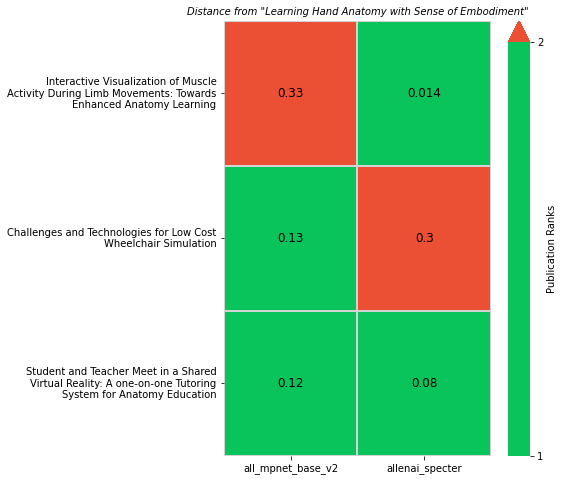

array([[5, 1],
       [2, 3],
       [1, 2]])

In [614]:
target_title1 = "Learning Hand Anatomy with Sense of Embodiment"
B = draw_plot(target_title1, 3)
B = np.array(B)
B

In [591]:
def calculate_dist(model, paper, target):
    f = open(f'../embeddings/high_dimension/{model}_high_dim.json')
    data = json.load(f)
    target_emb = data[target]
    paper_emb = data[paper]
    dist = distance.cosine(target_emb, paper_emb)
    return dist



In [592]:
model = "pubmedbert"
target = "Visual Analytics in Digital Pathology: Challenges and Opportunities"
paper1 = "Visual Analytics in Histopathology Diagnostics: a Protocol-Based Approach"
dist = calculate_dist(model, paper1, target)
dist

0.043578611853863025

In [ ]:
with open('../articles_data/all_articles_with_thumbnail_metadata.json') as f:
    papers = json.load(f)

article_titles = [paper['article_title'] for paper in papers]

In [570]:
with open('../articles_data/all_articles_with_thumbnail_metadata.json') as f:
    papers = json.load(f)

article_titles = [paper['article_title'] for paper in papers]

In [523]:
def create_rank_matrix(target_title, K, drawplot=False):
    # models = ['allenai_specter','all_mpnet_base_v2','biowordvec',
    #           'generic_fasttext', 'TFIDF', 'BOW']
    # model_names = ['allenai_specter','all_mpnet_base_v2','BioWordVec',
    #           'Generic fastText','TFIDF','BOW']

    # model_names = ['BioWordVec','Generic fastText']
    models = ['allenai_specter', 'pubmedbert', 'generic_fasttext']
    model_names = ['allenai_specter', 'PubMedBERT', 'Avg. Generic fastText']

    all_points = {model: load_points(model, target_title, k=236) for model in models}
    points = {model: load_points(model, target_title, k=K) for model in models}

    # print(len(points))
    allkey = reduce(set.union, map(set, map(dict.keys, points.values())))
    if target_title in allkey:
        allkey.remove(target_title)

    d = np.zeros((len(allkey), len(models)))
    all_dist = []
    index_a = []
    for key in allkey:
        item = [points[m][key] if key in points[m] else all_points[m][key] for m in models]
        a = [list(points[m].keys()).index(key) if key in points[m] else list(all_points[m].keys()).index(key) for m in
             models]
        index_a.append(a)
        all_dist.append(item)

    A = np.array(all_dist)
    B = np.array(index_a)

    avg = np.average(A, axis=0)

    labels = ['\n'.join(wrap(l, 30)) for l in allkey]
    # my_colors = ['#08c45b', '#eded72','#926dd1','#6f6dd1', '#bf62b7']
    my_colors = ['#08c45b']
    my_cmap = ListedColormap(my_colors)
    my_cmap.set_over('#eb4f34')
    if drawplot:
        print(allkey)
        fig, ax = plt.subplots(figsize=(6, 8))
        ax = sns.heatmap(B, xticklabels=model_names, yticklabels=labels, annot=A,
                         cbar_kws={'label': 'Publication Ranks',
                                   'extend': 'max',
                                   'ticks': [0, 3]},
                         cmap=my_cmap, vmin=0, vmax=3, cbar=True, ax=ax,
                         annot_kws={'fontsize': 12, 'color': 'black', 'alpha': 1}, linewidths=0.08,
                         linecolor='lightgray')
        colorbar = ax.collections[0].colorbar
        colorbar.set_ticks([0, 3])
        colorbar.set_ticklabels(['1', '3'])
        plt.title(label=f'Distance from \"{target_title}\"', fontsize=10, fontstyle='oblique')
        plt.show()
    return B

127
70
61
74
207
133
184
84
49
25
146
37
112
229
26
227
56
48
89
98
123
151
225
149
199
198
216
4
30
143
185
141
136
230
161
180
138
196
221
44
144
82
142
152
3
131
129
50
104
201
79
47
117
228
150
224
75
55
175
92
66
81
58
110
235
93
187
128
69
124
78
177
57
173
171
29
164
162
96
114
68
145
200
101
233
43
73
76
159
41
223
208
97
64
121
13
231
63
178
86
42
77
9
219
52
234
40
174
105
222
8
109
166
71
1
34
72
220
85
2
45
137
113
147
203
100
38
53
62
31
156
214
211
210
0
87
226
99
125
139
33
28
22
60
148
46
135
67
126
182
209
15
168
94
65
90
153
59
165
122
170
119
27
191
157
106
192
176
218
169
11
107
54
120
186
188
91
12
7
17
194
116
80
88
215
167
83
111
51
6
108
16
35
205
213
163
32
179
172
10
190
20
202
118
217
232
206
102
154
24
39
197
19
160
18
21
134
23
181
195
115
212
132
14
5
155
193
189
158
95
103
140
36
130
183
204
127
70
161
74
38
12
3
87
26
109
104
219
156
50
75
144
94
196
152
118
123
202
232
93
151
143
43
159
235
171
210
175
30
66
25
107
18
207
124
42
19
225
174
77
126
189
97

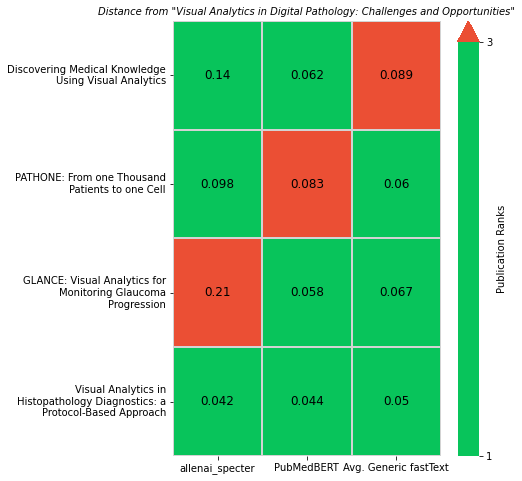

array([[ 3,  3, 12],
       [ 2, 51,  2],
       [34,  2,  3],
       [ 1,  1,  1]])

In [524]:
target_title1 = "Visual Analytics in Digital Pathology: Challenges and Opportunities"
B = create_rank_matrix(target_title1, 4, True)
B

In [313]:
# import pandas as pd

# target_title1 = "A Framework for Visual Comparison of 4D PC-MRI Aortic Blood Flow Data"
# target_title2 = "Visual Analytics in Digital Pathology: Challenges and Opportunities"
# article = "A Framework for Visual Comparison of 4D PC-MRI Aortic Blood Flow Data"
# A, B = draw_plot(article)

# draw_plot(target_title2)
# models = ['all-mpnet-base-v2', 'allenai-specter', 'BioBERT', 'PubMedBert', 'BioWordVec',
#           'Generic fastText']
# rank_matrix = []
# dist_matrix = []
# count = 0
# all_cor_mat = []
# all_dist_mat = []
# # draw_plot(target_title3)
# for article in article_titles:
#     B = create_rank_matrix(article, K=5)
#     # x = A.mean(axis=0)
#     # all_dist_mat.append(x)
#     df = pd.DataFrame(B)
#     cor_B = df.corr(method="spearman")
#     all_cor_mat.append(cor_B)


#     dist_matrix.append(A)
#     rank_matrix.append(B)

KeyboardInterrupt: 

In [232]:
# x = np.array(all_dist_mat).mean(axis=0)
# x

In [489]:
# all_cor_mat = np.array(all_cor_mat)
# x = np.mean(all_cor_mat, axis=0)
# y = pd.DataFrame(x, columns=['all-mpnet-base-v2', 'allenai-specter', 'BioBERT', 'PubMedBert', 'BioWordVec',
#                              'Generic fastText'])
# sns.heatmap(y, cmap="coolwarm", mask=np.triu(y), yticklabels=models, annot=y)



In [54]:
# import pandas as pd
#
# df = pd.DataFrame(B, columns=['all_mpnet', 'allenai', 'biowordvec', 'generic_fast'])
# my_r = df.corr(method="spearman")
# fig, ax = plt.subplots(figsize=(6, 6))
# sns.heatmap(my_r, cmap="coolwarm", mask=np.triu(my_r))

ValueError: Shape of passed values is (14, 6), indices imply (14, 4)

In [55]:
# import pandas as pd
#
# df = pd.DataFrame(B, columns=['all_mpnet', 'allenai', 'biobert', 'pubmedbert', 'biowordvec', 'generic_fast', 'tfidf',
#                               'bow'])
# my_r = df.corr(method="spearman")
# fig, ax = plt.subplots(figsize=(6, 6))
# sns.heatmap(my_r, cmap="coolwarm", mask=np.triu(my_r))

ValueError: Shape of passed values is (14, 6), indices imply (14, 8)

In [485]:
# a = np.array(8)
# A = np.append(a, B)
# A

In [486]:
# import pandas as pd
#
# df = pd.DataFrame(B, columns=['all_mpnet', 'allenai', 'biobert', 'pubmedbert', 'biowordvec', 'generic_fast'])
# my_r = df.corr(method="spearman")
# fig, ax = plt.subplots(figsize=(6, 6))
# sns.heatmap(my_r, cmap="coolwarm", mask=np.triu(my_r))

In [487]:
def generate_rank_matrix(target_title, K, drawplot=False):
    models = ['allenai_specter', 'all_mpnet_base_v2', 'pubmedbert', 'biowordvec',
              'generic_fasttext', 'tfidf', 'bow']
    model_names = ['all-mpnet-base-v2', 'allenai-specter', 'PubMedBert', 'Avg. BioWordVec',
                   'Avg. Generic fastText', 'TFIDF', 'BOW']
    # models = ['biowordvec','generic_fasttext']
    # model_names = ['BioWordVec','Generic fastText']
    # models = ['allenai_specter','all_mpnet_base_v2']
    # model_names = ['allenai_specter','all_mpnet_base_v2']

    all_points = {model: load_points(model, target_title, k=236) for model in models}
    points = {model: load_points(model, target_title, k=K) for model in models}

    articles_from_models = [r for x in list(points.values()) for r in x]

    # print(len(points))
    allkey = reduce(set.union, map(set, map(dict.keys, points.values())))
    if target_title in articles_from_models:
        articles_from_models.remove(target_title)

    d = np.zeros((len(allkey), len(models)))
    all_dist = []
    index_a = []
    for key in articles_from_models:
        item = [points[m][key] if key in points[m] else all_points[m][key] for m in models]
        a = [list(points[m].keys()).index(key) if key in points[m] else list(all_points[m].keys()).index(key) for m in
             models]
        index_a.append(a)
        all_dist.append(item)

    A = np.array(all_dist)
    B = np.array(index_a)

    avg = np.average(A, axis=0)

    labels = ['\n'.join(wrap(l, 50)) for l in articles_from_models]
    my_colors = ['#08c45b']
    my_cmap = ListedColormap(my_colors)
    my_cmap.set_over('#eb4f34')
    if drawplot:
        fig, ax = plt.subplots(figsize=(6, 6))
        ax = sns.heatmap(B, xticklabels=model_names, yticklabels=labels, annot=A,
                         cbar_kws={'label': 'Publication Ranks',
                                   'extend': 'max',
                                   'ticks': [1, 2]},
                         cmap=my_cmap, vmin=1, vmax=2, cbar=True, ax=ax,
                         annot_kws={'fontsize': 12, 'color': 'black', 'alpha': 1}, linewidths=0.08,
                         linecolor='lightgray')
        colorbar = ax.collections[0].colorbar
        colorbar.set_ticks([1, 2])
        colorbar.set_ticklabels(['1', '2'])
        plt.title(label=f'Distance from \"{target_title}\"', fontsize=10, fontstyle='oblique')
        plt.show()
    return B

In [488]:
import pandas as pd

# target_title1 = "A Framework for Visual Comparison of 4D PC-MRI Aortic Blood Flow Data"
# target_title2 = "Visual Analytics in Digital Pathology: Challenges and Opportunities"
# article = "A Framework for Visual Comparison of 4D PC-MRI Aortic Blood Flow Data"
# A, B = draw_plot(article)

# draw_plot(target_title2)
models = ['all-mpnet-base-v2', 'allenai-specter', 'PubMedBert', 'Avg. BioWordVec',
          'Avg. Generic fastText', 'TFIDF', 'BOW']
model_names = ['all-mpnet-base-v2', 'allenai-specter', 'PubMedBert', 'Avg. BioWordVec',
               'Avg. Generic fastText', 'TFIDF', 'BOW']
rank_matrix = []
dist_matrix = []
count = 0
all_mat = []
all_dist_mat = []
# draw_plot(target_title3)
for article in article_titles:
    B = generate_rank_matrix(article, K=6, drawplot=False)
    df = pd.DataFrame(B)
    all_mat.append(df)

In [490]:
R = np.mean(np.array(all_mat), axis=0)
R

array([[ 0.        ,  6.57627119, 50.11016949, 21.18644068, 21.44915254,
        20.77118644, 27.6440678 ],
       [ 1.        ,  9.84745763, 57.63983051, 25.63559322, 27.14830508,
        30.79237288, 36.19915254],
       [ 2.        , 10.61864407, 62.84745763, 35.26271186, 34.51694915,
        35.43644068, 39.01694915],
       [ 3.        , 17.05508475, 73.52542373, 39.27966102, 37.26694915,
        39.78389831, 46.27542373],
       [ 4.        , 15.51271186, 67.19067797, 38.23305085, 40.28389831,
        37.52118644, 44.6059322 ],
       [ 6.22457627,  0.        , 50.45762712, 17.97881356, 19.34745763,
        16.88559322, 22.66949153],
       [ 9.37288136,  1.        , 57.70338983, 24.02542373, 26.12288136,
        25.44915254, 29.51271186],
       [13.18644068,  2.        , 60.97881356, 25.91949153, 25.86016949,
        23.63983051, 28.1440678 ],
       [14.8940678 ,  3.        , 60.98728814, 32.66949153, 32.59745763,
        32.28813559, 37.11016949],
       [16.99152542,  4.    

<AxesSubplot:>

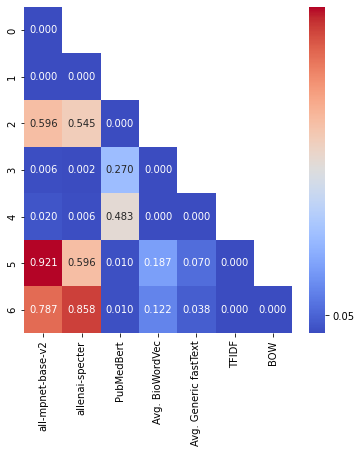

In [495]:
from scipy.stats import spearmanr

pvalues = []
main = []
for i in range(len(model_names)):
    for j in range(len(model_names)):
        rho, pr = spearmanr(R[:, i], R[:, j])
        pvalues.append(pr)
        if j == len(model_names) - 1:
            main.append(pvalues)
            pvalues = []
df1 = pd.DataFrame(main, columns=model_names)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df1, cmap="coolwarm", mask=np.triu(df1), annot=True, fmt='.3f', cbar_kws={'ticks': [0.05]})


<AxesSubplot:>

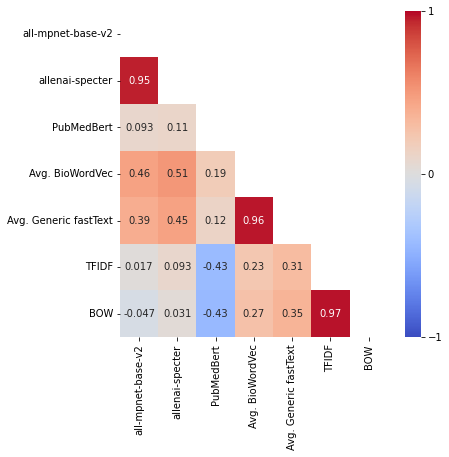

In [493]:
import pandas as pd

df = pd.DataFrame(R, columns=['all-mpnet-base-v2', 'allenai-specter', 'PubMedBert', 'Avg. BioWordVec',
                              'Avg. Generic fastText', 'TFIDF', 'BOW'])
my_r = df.corr(method="spearman")
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(my_r, cmap="coolwarm", mask=np.triu(my_r), annot=my_r, cbar_kws={'ticks': [-1, 0, 1]}, cbar=True, vmin=-1,
            vmax=1)